# Introduction

In my role as a junior data analyst within Cyclistic's marketing analytics team, I'm currently participating a project to identify growth opportunities through customer segmentation.

Instead of solely focusing on acquiring new customers, the director of marketing, Moreno requested to analyze the behavior of existing customer segments – annual members and casual riders. By understanding their distinct behaviors, to develop a targeted marketing strategy that converts casual riders into loyal annual members. 

Following the established data analysis process – Ask, Prepare, Process, Analyze, Share, and Act – I am going to leverage customer data to gain insights and build a conversion strategy for casual riders.

# Ask

Assigned Question: How do annual members and causal riders use Cyclistic bikes differently?

Analysis Objective:
To optimize the marketing strategy, I aim to understand how annual members (members) and casual riders (casual) utilize Cyclistic bikes. Specifically, I'll investigate:
- Rideable Types: exploring the usage of different rideable types differs between the members and casual riders
- Ride Duration: analyzing the average ride duration to compare how long members ride compared to the causal rides, helps to understand their riding preferences
- Daily Usage Patterns: analyzing how bikes are used on each specific day of the week, eg. weekday vs. weekend)
- Monthly Usage Patterns: examining overall usage trends across each month can identify the potential difference between the users and seasonal variations

# Prepare

Python are implmented to perform a yearly analysis on the datasets of Cyclistic trip data, from January 2023 to December 2023. The datasets are uploaded by Motivate International Inc. 

In [2]:
# Data Manipulation and Analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
#%conda install -c conda-forge seaborn
#%pip install seaborn
import seaborn as sns

In [3]:
# Import all the datasets
data_Jan = pd.read_csv("202301-divvy-tripdata.csv")

data_Feb = pd.read_csv("202302-divvy-tripdata.csv")

data_Mar = pd.read_csv("202303-divvy-tripdata.csv")

data_Apr = pd.read_csv("202304-divvy-tripdata.csv")

data_May = pd.read_csv("202305-divvy-tripdata.csv")

data_Jun = pd.read_csv("202306-divvy-tripdata.csv")

data_Jul = pd.read_csv("202307-divvy-tripdata.csv")

data_Aug = pd.read_csv("202308-divvy-tripdata.csv")

data_Sep = pd.read_csv("202309-divvy-tripdata.csv")

data_Oct = pd.read_csv("202310-divvy-tripdata.csv")

data_Nov = pd.read_csv("202311-divvy-tripdata.csv")

data_Dec = pd.read_csv("202312-divvy-tripdata.csv")

# Process

In [4]:
# Data Cleaning and Preprocessing
## Combine all dataframes into one

dataframes = [data_Jan, data_Feb, data_Mar, 
              data_Apr, data_May, data_Jun, 
              data_Jul, data_Aug, data_Sep, 
              data_Oct, data_Nov, data_Dec]

df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Exploratory Data Anslysis (EDA)

In [5]:
## Understand the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [6]:
## Check for duplicate entries
df.duplicated().sum()

0

In [6]:
## Check for missing value (NA)
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

All 3 datasets are free of duplicate entries. However, a significant numebr of missing values require attention in the next step. 

In [7]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.926069,-87.638858,41.930000,-87.640000,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799554,-87.594617,41.809835,-87.599383,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799587,-87.594670,41.809835,-87.599383,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


The analysis scope focuses on ride duarion, daily usage patterns and monthl usage pattersn, removing "start_lat", "start_lng", "end_lat", and "end_lng" won't significantl impact the analysis. Due to the lack of the actual distance between statiosn, it is challenging to calculae the total trip distance. Therefore, "start_station_name", "start_station_id", "end_station_name", and "end_station_id" are going to be removed in the data frame.

In [5]:
## Remove unneccessary columns - (a)"start_lat", "start_lng", "end_lat", and "end_lng"
df_processed = df.copy()
df_processed = df.drop(["start_lat", "start_lng", "end_lat", "end_lng",
                       "start_station_name", "start_station_id", "end_station_name", "end_station_id"], 
                       axis = 1)

In [17]:
df_processed.head(10)

,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member


In [8]:
## Check if there is any missing data after removing specific columns
df_processed.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

In [6]:
## Create new column: ride_length - duration of the ride
df_processed['started_at'] = pd.to_datetime(df_processed['started_at'])
df_processed['ended_at'] = pd.to_datetime(df_processed['ended_at'])

df_processed['ride_length'] = df_processed['ended_at'] - df_processed['started_at']
df_processed['ride_length'] = (df_processed['ride_length'].dt.total_seconds() / 60).round(2)

In [7]:
## Create new column: day_of_week - the distribution of bike usage by weekday
df_processed['day_of_week'] = df_processed['started_at'].dt.day_name()

In [8]:
## Create new column: month - the distribution of bike usage by month
df_processed['month'] = df_processed['started_at'].dt.strftime('%b')

In [13]:
df_processed.head(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week,month
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.85,Saturday,Jan
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,8.48,Tuesday,Jan
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,13.23,Monday,Jan
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,8.77,Sunday,Jan
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,15.32,Thursday,Jan


In [11]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_length    float64       
 6   day_of_week    object        
 7   month          object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 349.1+ MB


In [12]:
df_processed.shape

(5719877, 7)

After data processing, there are 5719877 of rows and 7 of columns in this dataframe. 

In [12]:
## Descriptive Statistics
df_processed.describe()

,started_at,ended_at,ride_length
count,5719877,5719877,5.719877e+06
mean,2023-07-16 10:27:50.017874688,2023-07-16 10:46:00.177127168,1.816932e+01
min,2023-01-01 00:01:58,2023-01-01 00:02:41,-1.665652e+04
25%,2023-05-21 12:50:44,2023-05-21 13:14:09,5.420000e+00
50%,2023-07-20 18:02:50,2023-07-20 18:19:47,9.530000e+00
75%,2023-09-16 20:08:49,2023-09-16 20:28:10,1.692000e+01
max,2023-12-31 23:59:38,2024-01-01 23:50:51,9.848907e+04
std,NaN,NaN,1.808430e+02


# Analyze

Text(0.5, 1.0, 'Propotion of Membership Status ')

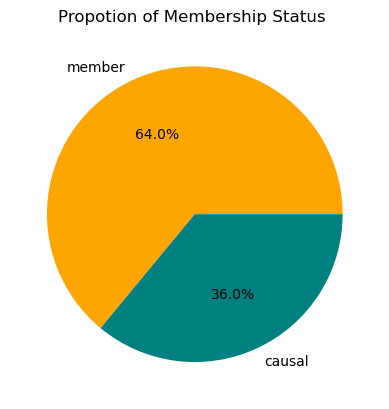

In [21]:
users_count = df_processed['member_casual'].value_counts()

plt.pie(
    users_count,
    labels = ['member', 'causal'],
    autopct = '%1.1f%%',
    colors = ['orange', 'teal'])

plt.title("Propotion of Membership Status ")

Observation:
   - Proportion: 
       - In 2023, 5719877 cyclists used Cyclistic in 2023, with 3,608,328 annual members (64%) and 2,111,549 causal riders(36%)

  # 1. Riderable Type

(array([0, 1, 2]),
 [Text(0, 0, 'classic_bike'),
  Text(1, 0, 'docked_bike'),
  Text(2, 0, 'electric_bike')])

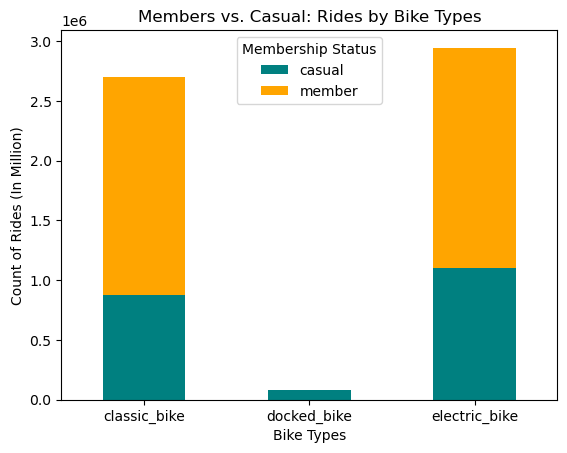

In [22]:
bike_type_by_user_count = df_processed.groupby(['rideable_type', 'member_casual']).size().unstack()

bike_type_by_user_count.plot(
    kind = 'bar',
    stacked = True,
    color = ['teal', 'orange']) 

plt.xlabel('Bike Types')
plt.ylabel('Count of Rides (In Million)')
plt.title('Members vs. Casual: Rides by Bike Types')
plt.legend(title = 'Membership Status')
plt.xticks(rotation = 360) 

<Axes: xlabel='member_casual'>

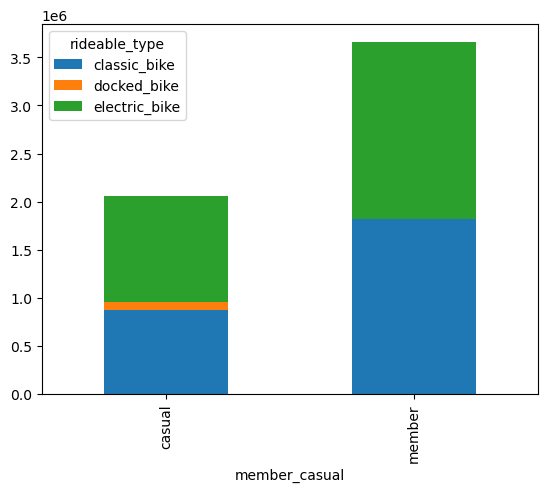

In [18]:
# REVISION - stacked bar plots
member_type = df_processed.groupby(['member_casual', 'rideable_type']).size().unstack()

member_type.plot(
    kind = 'bar',
    stacked = True
)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

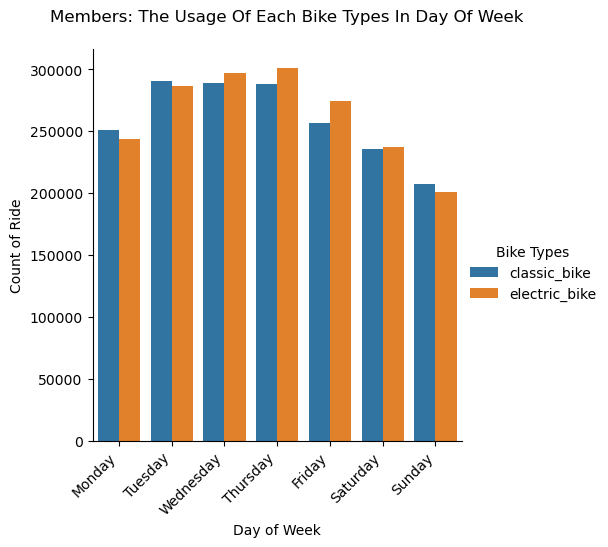

In [18]:
bike_type_by_weekday_member = df_processed[df_processed['member_casual'] == 'member'].groupby(['day_of_week','rideable_type']).size()

df_bike_type_by_weekday_member = bike_type_by_weekday_member.to_frame(name = 'Count of Ride')
df_bike_type_by_weekday_member = df_bike_type_by_weekday_member.reset_index()


df_member = pd.DataFrame({'Day of Week': df_bike_type_by_weekday_member['day_of_week'],
                          'Count of Ride': df_bike_type_by_weekday_member['Count of Ride'],
                          'Bike Types': df_bike_type_by_weekday_member['rideable_type']})


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cp_member = sns.catplot(
    data = df_member,
    x = 'Day of Week',
    y = 'Count of Ride',
    hue = 'Bike Types',
    kind = 'bar',
    order = day_order)

cp_member.fig.suptitle('Members: The Usage Of Each Bike Types In Day Of Week')
cp_member.fig.subplots_adjust(top = 0.9)
plt.xticks(rotation = 45, ha = 'right') 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

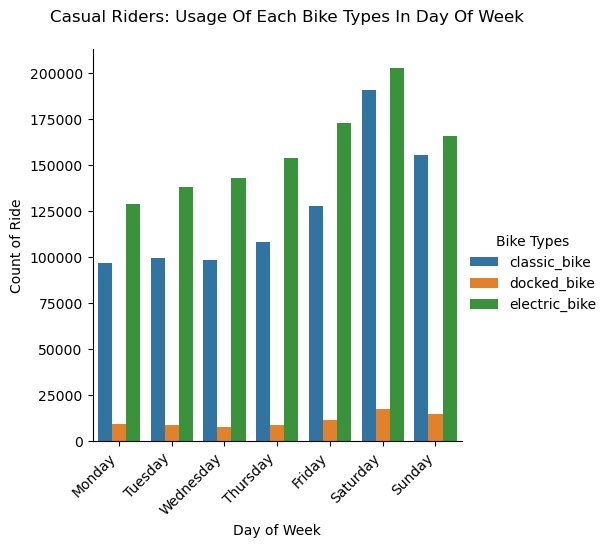

In [19]:
bike_type_by_weekday_casual = df_processed[df_processed['member_casual'] == 'casual'].groupby(['day_of_week','rideable_type']).size()

df_bike_type_by_weekday_casual = bike_type_by_weekday_casual.to_frame(name = 'Count of Ride')
df_bike_type_by_weekday_casual = df_bike_type_by_weekday_casual.reset_index()


df_casual = pd.DataFrame({'Day of Week': df_bike_type_by_weekday_casual['day_of_week'],
                          'Count of Ride': df_bike_type_by_weekday_casual['Count of Ride'],
                          'Bike Types': df_bike_type_by_weekday_casual['rideable_type']})


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cp_casual = sns.catplot(
    data = df_casual,
    x = 'Day of Week',
    y = 'Count of Ride',
    hue = 'Bike Types',
    kind = 'bar',
    order = day_order)

cp_casual.fig.suptitle('Casual Riders: Usage Of Each Bike Types In Day Of Week')
cp_casual.fig.subplots_adjust(top = 0.9)
plt.xticks(rotation=45, ha='right') 

Observations of Riderable Types: 
- Similarities: 
    - Bike Type Prefernces: Both groups show a preference for electric bikes
- Differences: 
    - Bike Type Variety: Causal riders utilize all three types of bikes (classic, docked, and electric) while members only use classic and electric bikes

 # 2. Ride Duration

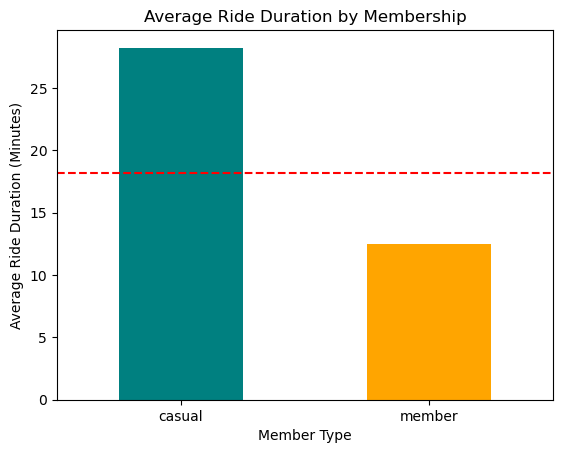

In [19]:
average_ride_length = df_processed['ride_length'].describe().loc['mean']

riders_average_ride_length = df_processed.groupby('member_casual')['ride_length'].mean()

riders_average_ride_length.plot(kind = 'bar', color = ['teal', 'orange'])
plt.title('Average Ride Duration by Membership')
plt.xlabel("Member Type")
plt.ylabel("Average Ride Duration (Minutes)")
plt.xticks(rotation = 360) 

plt.axhline(average_ride_length, 
            color = 'red', 
            linestyle = '--')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

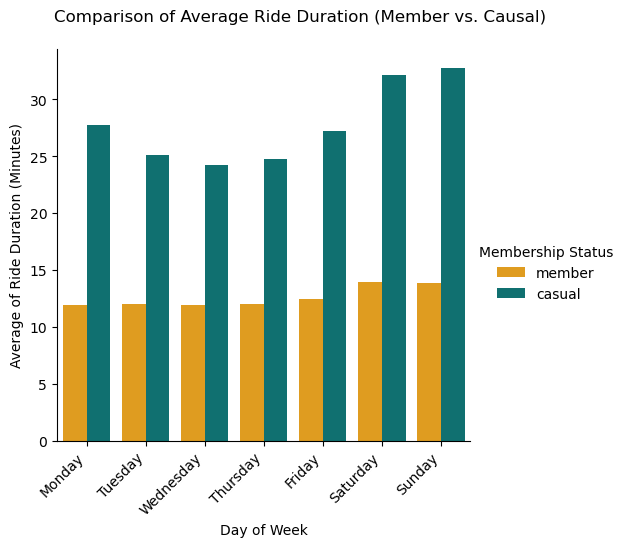

In [20]:
average_ride_length_by_weekday_member = df_processed[df_processed['member_casual'] == 'member'].groupby('day_of_week')['ride_length'].mean(numeric_only=True)
average_ride_length_by_weekday_casual = df_processed[df_processed['member_casual'] == 'casual'].groupby('day_of_week')['ride_length'].mean(numeric_only=True)

df_average_ride_length_member = average_ride_length_by_weekday_member.to_frame(name = 'average_ride_length')
df_average_ride_length_member['membership_status'] = 'member'

df_average_ride_length_causal = average_ride_length_by_weekday_casual.to_frame(name = 'average_ride_length')
df_average_ride_length_causal['membership_status'] = 'casual'

df_average_ride_length = pd.concat([df_average_ride_length_member, df_average_ride_length_causal], axis=0)
df_average_ride_length = df_average_ride_length.reset_index()

average_ride_length_riders_by_day_of_week = pd.DataFrame({'Day of Week': df_average_ride_length['day_of_week'],
                                                             'Average of Ride Duration (Minutes)': df_average_ride_length['average_ride_length'],
                                                             'Membership Status': df_average_ride_length['membership_status']})

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cp = sns.catplot(
    data = average_ride_length_riders_by_day_of_week,
    x = 'Day of Week',
    y = 'Average of Ride Duration (Minutes)',
    hue = 'Membership Status',
    kind = 'bar',order = day_order,
    palette = ['orange', 'teal'])

cp.fig.suptitle('Comparison of Average Ride Duration (Member vs. Causal)')
cp.fig.subplots_adjust(top = 0.9)
plt.xticks(rotation = 45, ha = 'right') 

Observations of Ride Duration:
- Similarities: 
    - Weekend Usage: Both casual riders and annual members spend more time riding on the weekend
- Differences: 
    - Ride Duration: On average, casuul riders have a longer ride duration compared to the annual members

# 3. Daily Usage Patterns

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuseday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

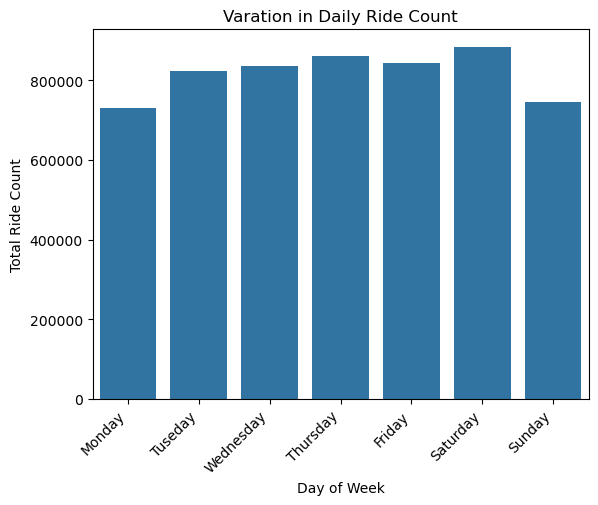

In [47]:
day_order = ['Monday', 'Tuseday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts = df_processed.groupby(['day_of_week', 'member_casual']).size().reset_index(name = 'count')
day_totals = day_counts.groupby('day_of_week')['count'].sum().reset_index()

sns.barplot(
    data = day_totals,
    x = 'day_of_week',
    y = 'count',
    order = day_order
)

plt.xlabel('Day of Week')
plt.ylabel('Total Ride Count')
plt.title('Varation in Daily Ride Count')
plt.xticks(rotation = 45, ha = 'right')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuseday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

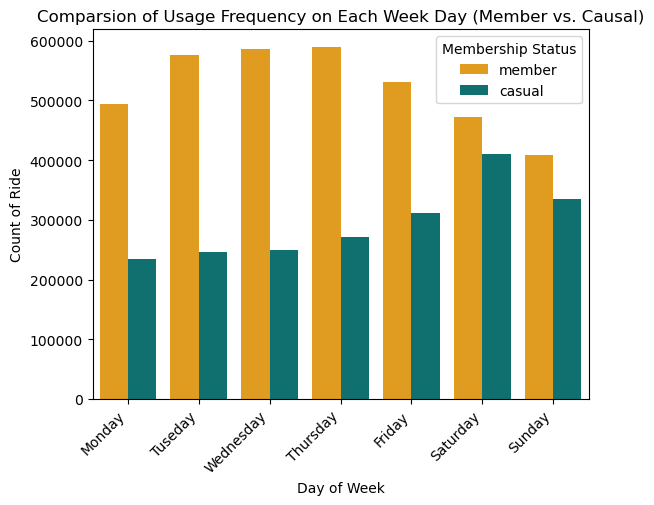

In [194]:
day_order = ['Monday', 'Tuseday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

c = sns.countplot(
    data = df_processed, 
    x = 'day_of_week', 
    hue = 'member_casual', 
    order = day_order, 
    palette =['orange', 'teal'])

c.set_xlabel('Day of Week')
c.set_ylabel('Count of Ride')
c.set_title('Comparsion of Usage Frequency on Each Week Day (Member vs. Causal)')
plt.legend(title = 'Membership Status')
plt.xticks(rotation=45, ha='right') 

Observations of Daily Usage Patterns:
- Similarities:
    - Sunday: Both casual and member riders exhibit the lowest usage on Sundays. This suggests a shared preference for leisure activities other than cycling on Sundays
- Differences:
    - Weekdays: Member usage dominates due to commutes. Casual ridership is likely lower during weekdays as work or other commitments might take priority
    - Weekends: Casual ridership increases for leisure purposes, potentially exceeding member usage. Saturday could be a good example of this difference

# 4. Monthly Usage Patterns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

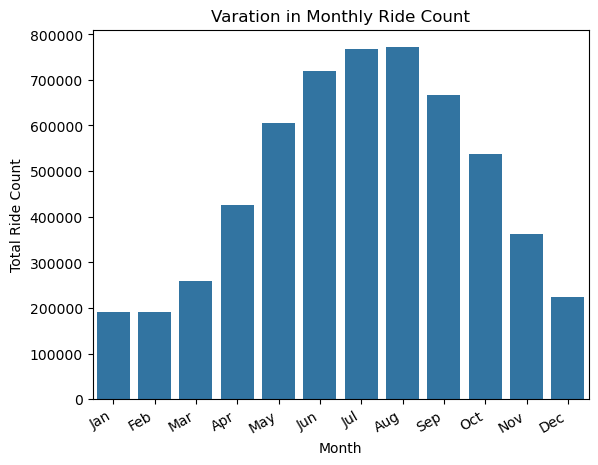

In [32]:
month_counts = df_processed.groupby(['month', 'member_casual']).size().reset_index(name = 'count')

month_totals = month_counts.groupby('month')['count'].sum().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.barplot(
    data = month_totals,
    x = 'month',
    y = 'count',
    order = month_order
)

plt.xlabel('Month')
plt.ylabel('Total Ride Count')
plt.title('Varation in Monthly Ride Count')
plt.xticks(rotation = 30, ha = 'right')

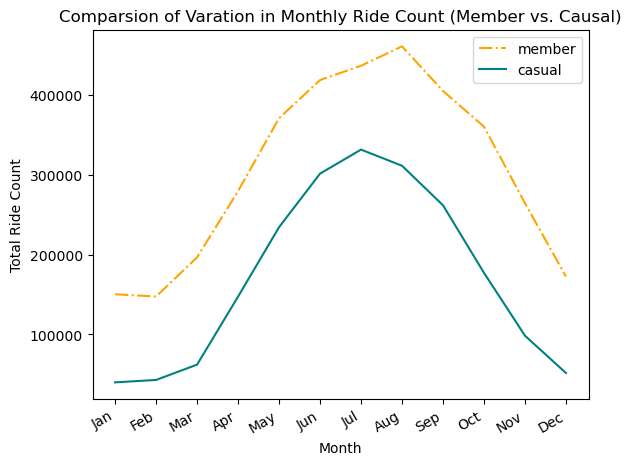

In [11]:
month_counts = df_processed.groupby(['month', 'member_casual']).size().reset_index(name = 'count')
month_counts['month_num'] = pd.to_datetime(month_counts['month'], format = '%b').dt.month
month_counts_sorted = month_counts.sort_values(by=['month_num'])

month_counts_members = month_counts_sorted.query("member_casual == 'member'")
month_counts_casual = month_counts_sorted.query("member_casual == 'casual'")

plt.plot(
    month_counts_members['month'],
    month_counts_members['count'],
    label = 'member',
    color = 'orange',
    linestyle = '-.')

plt.plot(
    month_counts_casual['month'],
    month_counts_casual['count'],
    label = 'casual',
    color = 'teal',
    linestyle = '-')

plt.xlabel('Month')
plt.ylabel('Total Ride Count')
plt.title('Comparsion of Varation in Monthly Ride Count (Member vs. Causal)')
plt.xticks(rotation = 30, ha = 'right')
plt.legend()

Observarions:
- Similarities:
    - Correlation: There is a strong positive correlation between the cycling activity in members and casual riders and weather patterns
    - Seasonal Impact: Cycling activity significantly increases during warmer months (March to October) due to more favorable weather conditions. Conversely, colder temperatures and potential snowfall in winter (December to February) discourage cycling due to discomfort and safety concerns
- Differences:
    - One Month Apart: Although both members and casual riders exhibit a similar seasonal cycling trend, there is a one-month difference in their peak and drop-off points. Member ridership peaks in August while casual riders peak in July. Similarly, member activity drops off in October compared to September for casual riders

# Share

This analysis examined how annual members and casual riders utilize Cyclistic bikes. While both groups show a strong preference for electric bikes, they exhibit distinct differences in their usage patterns.

1. Weekday vs. Weekend: 
    Member usage dominates weekdays, likely due to work commutes. Casual ridership is lower on weekdays but increases significantly on weekends for leisure purposes. Saturdays see a peak in casual ridership compared to weekdays.

2. Ride Duration: 
    Compared to annual members, casual riders have longer rides on average. This suggests that members use the bikes for efficient commutes, while casual riders might use them for exploring or scenic rides.

3. Bike Type Variety: 
    Casual riders utilize all three bike types (classic, docked, and electric). However, annual members primarily use classic and electric bikes. Docked bikes might be less convenient for member commutes due to the need to return them to specific locations.
    
Overall, annual members rely on Cyclistic for weekday commutes, favoring classic and electric bikes for shorter rides. Casual riders, on the other hand, use the bikes more for leisure activities on weekends, often opting for longer rides and potentially utilizing all bike types.

# Act

To encourage casual riders to explore weekday cycling, Cyclistic can offer a limited-time "Weekday Discovery Pass" during warmer months (for example, from March to August). This pass would include one weekend ride and one weekday ride, allowing riders who enjoy cycling but avoid weekends due to unpredictability to discover the convenience of using Cyclistic bikes on weekdays. After completing the pass, riders can receive a discount on an annual membership, making it easier to switch to weekday commutes or regular rides.